## Projet de segmentation client

### Importation de bibliothèque

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Chargement de dataset:
data_client = pd.read_csv('Segmentation_client.csv')

In [4]:
data_client.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data_client.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data_client.drop(['CustomerID'], axis = 1, inplace= True)

data_client.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Visualisation de chaque colonne en fonction de la densité 

C:\Users\kouas\AppData\Local\Temp\ipykernel_39408\1515613560.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_client[x], bins = 20)
C:\Users\kouas\AppData\Local\Temp\ipykernel_39408\1515613560.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_client[x], bins = 20)
C:\Users\kouas\A

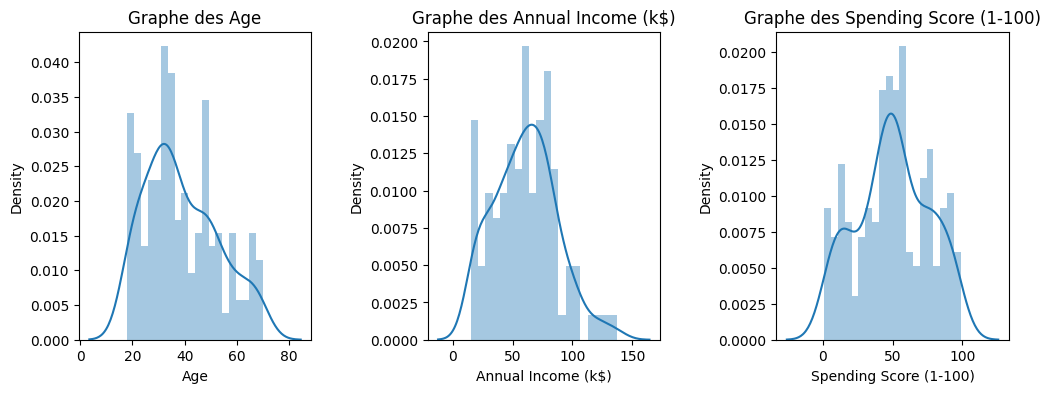

In [12]:
plt.figure(1, figsize=(12,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace= 0.5, wspace=0.5)
    sns.distplot(data_client[x], bins = 20)
    plt.title('Graphe des {}'.format(x))
plt.show()

### Visualisation du taux d'achat en fonction du genre dans notre dataset

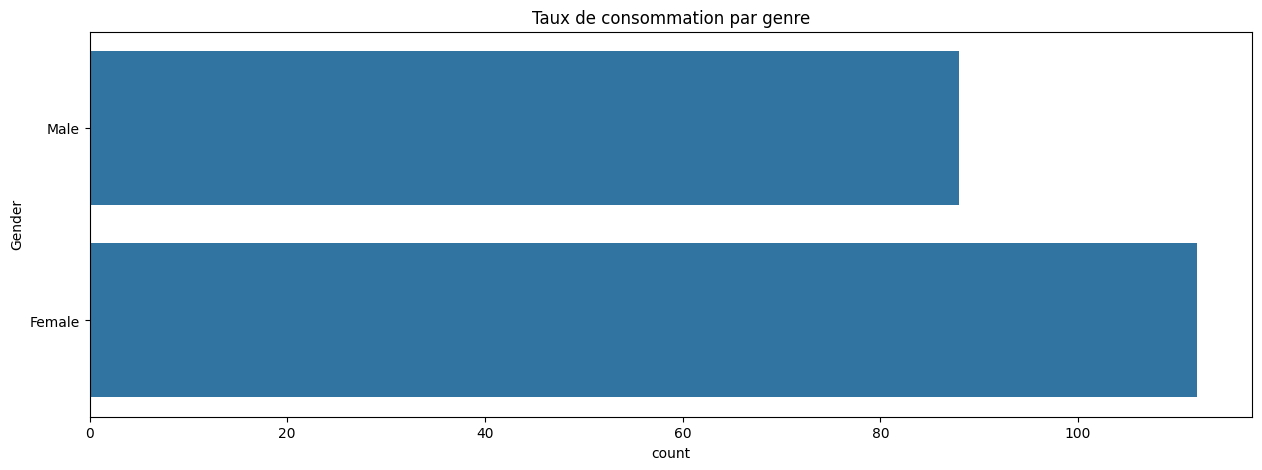

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(y = 'Gender' , data = data_client)
plt.title('Taux de consommation par genre')
plt.show()
# Nous remarquons que les femmes font plus d'achats que les hommes

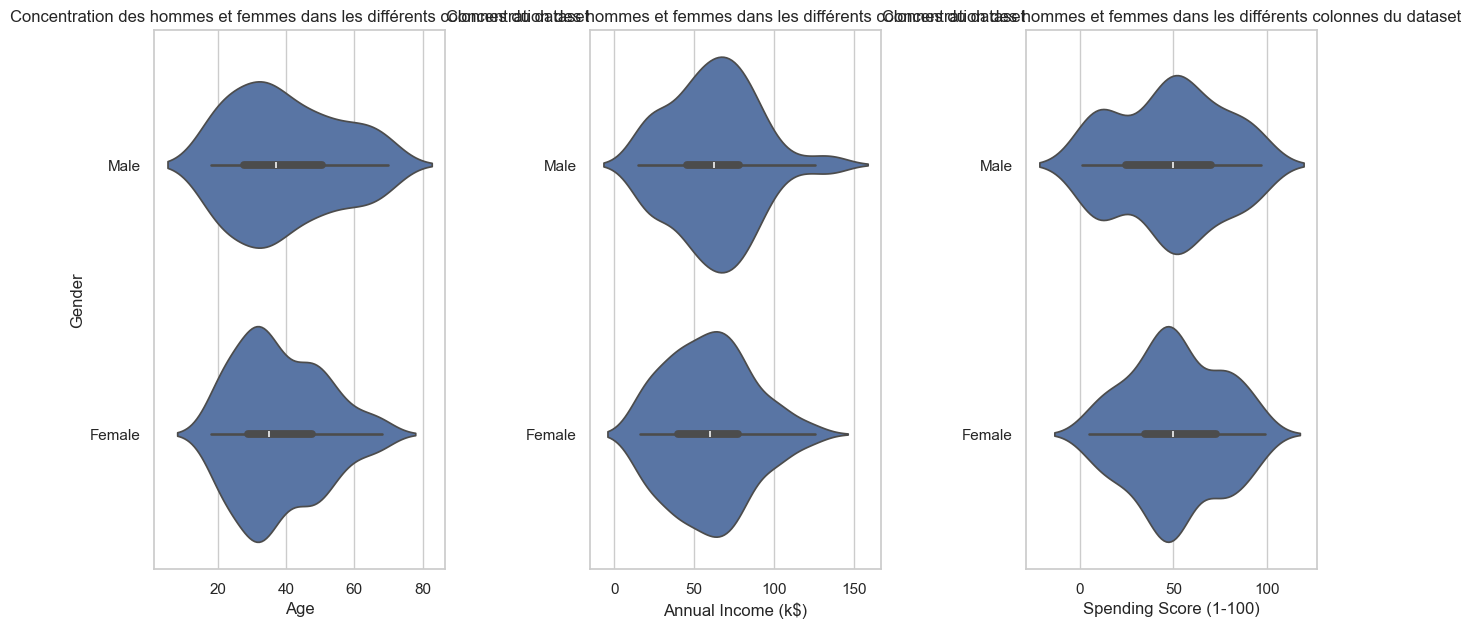

In [18]:
plt.figure(1, figsize=(15,7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace= 0.5, wspace=0.5)
    sns.violinplot(x = cols,y = 'Gender', data = data_client)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Concentration des hommes et femmes dans les différents colonnes du dataset')
plt.show()

C:\Users\kouas\AppData\Local\Temp\ipykernel_39408\1993303766.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = agex, y = agey , palette='mako')


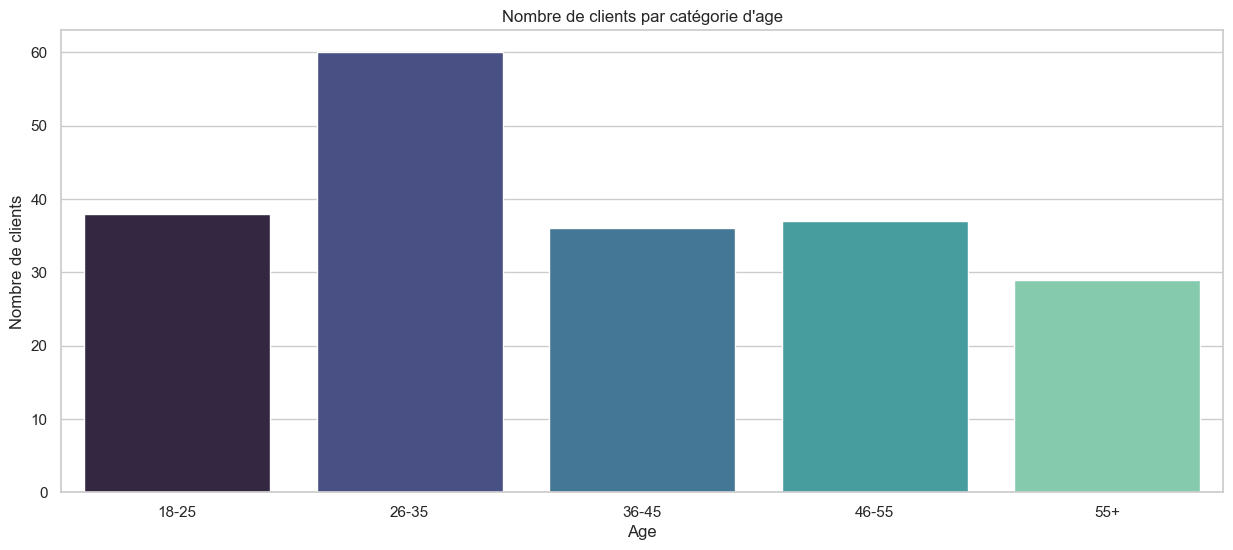

In [21]:
# Creation des groupes d'ages:
age_18_25 = data_client.Age[(data_client.Age >= 18) & (data_client.Age <= 25)]
age_26_35 = data_client.Age[(data_client.Age >= 26) & (data_client.Age <= 35)]
age_36_45 = data_client.Age[(data_client.Age >= 36) & (data_client.Age <= 45)]
age_46_55 = data_client.Age[(data_client.Age >= 46) & (data_client.Age <= 55)]
age_above_55 = data_client.Age[(data_client.Age >= 56)]

agex = ['18-25', '26-35', '36-45','46-55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]

plt.figure(figsize = (15,6))
sns.barplot(x = agex, y = agey , palette='mako')
plt.title("Nombre de clients par catégorie d'age")
plt.xlabel('Age')
plt.ylabel('Nombre de clients')
plt.show()

C:\Users\kouas\AppData\Local\Temp\ipykernel_39408\2249023230.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ssx, y = ssy, palette='rocket')


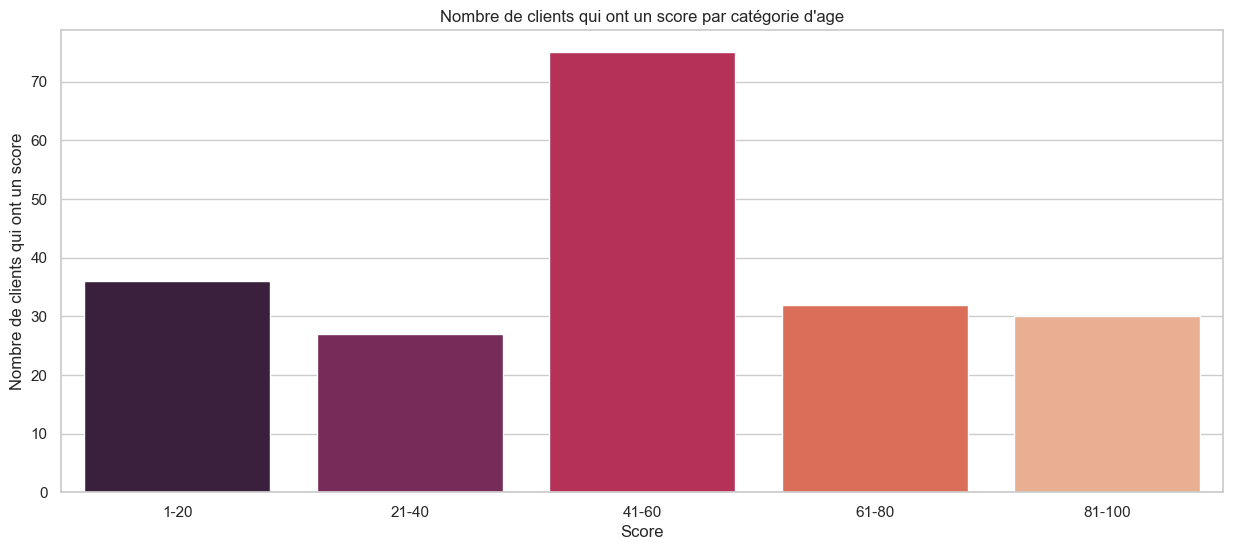

In [22]:
# Creating groups of ‘Spending Score’ column and visualizing it:
ss_1_20 = data_client['Spending Score (1-100)'][(data_client['Spending Score (1-100)'] >= 1) & (data_client['Spending Score (1-100)'] <= 20)]
ss_21_40 = data_client['Spending Score (1-100)'][(data_client['Spending Score (1-100)'] >= 21) & (data_client['Spending Score (1-100)'] <= 40)]
ss_41_60 = data_client['Spending Score (1-100)'][(data_client['Spending Score (1-100)'] >= 41) & (data_client['Spending Score (1-100)'] <= 60)]
ss_61_80 = data_client['Spending Score (1-100)'][(data_client['Spending Score (1-100)'] >= 61) & (data_client['Spending Score (1-100)'] <= 80)]
ss_81_100 = data_client['Spending Score (1-100)'][(data_client['Spending Score (1-100)'] >= 81) & (data_client['Spending Score (1-100)'] <= 100)]

ssx = ['1-20','21-40','41-60','61-80','81-100']
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = ssx, y = ssy, palette='rocket')
plt.title("Nombre de clients qui ont un score par catégorie d'age")
plt.xlabel('Score')
plt.ylabel('Nombre de clients qui ont un score')
plt.show()

C:\Users\kouas\AppData\Local\Temp\ipykernel_39408\426963990.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = annx, y = anny, palette='Spectral')


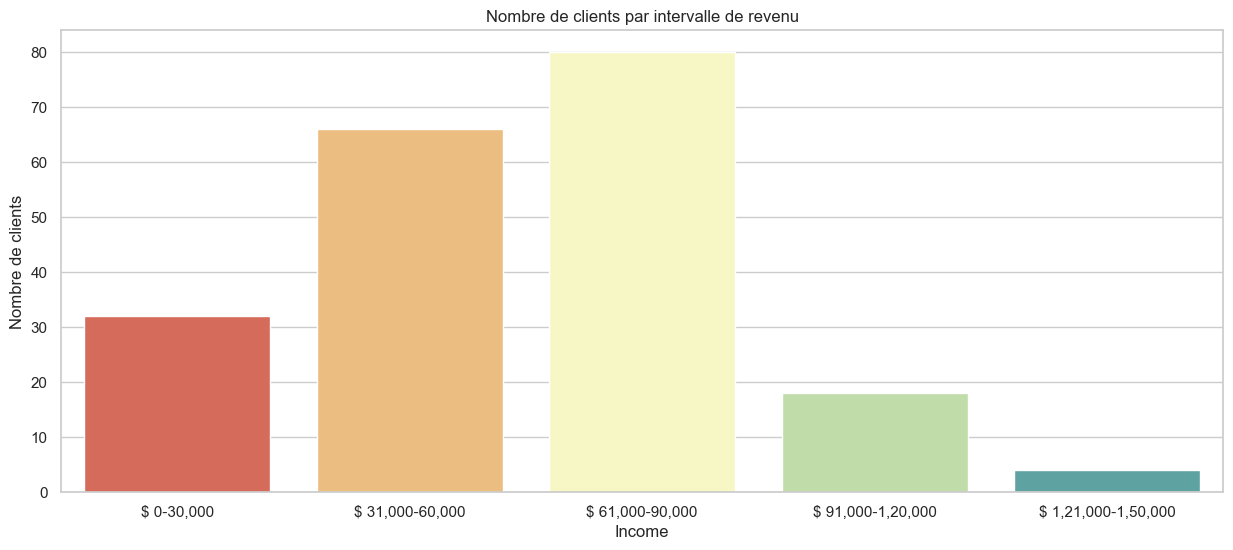

In [24]:
# Creating groups for ‘Annual Income’ column and visualizing it:

ann_0_30 = data_client['Annual Income (k$)'][(data_client['Annual Income (k$)'] >= 0 ) & (data_client['Annual Income (k$)'] <= 30)]
ann_31_60 = data_client['Annual Income (k$)'][(data_client['Annual Income (k$)'] >= 31 ) & (data_client['Annual Income (k$)'] <= 60)]
ann_61_90 = data_client['Annual Income (k$)'][(data_client['Annual Income (k$)'] >= 61 ) & (data_client['Annual Income (k$)'] <= 90)]
ann_91_120 = data_client['Annual Income (k$)'][(data_client['Annual Income (k$)'] >= 91 ) & (data_client['Annual Income (k$)'] <= 120)]
ann_121_150 = data_client['Annual Income (k$)'][(data_client['Annual Income (k$)'] >= 121 ) & (data_client['Annual Income (k$)'] <= 150)]

annx = ['$ 0-30,000','$ 31,000-60,000','$ 61,000-90,000','$ 91,000-1,20,000','$ 1,21,000-1,50,000']
anny = [len(ann_0_30.values),len(ann_31_60.values),len(ann_61_90.values),len(ann_91_120.values),len(ann_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = annx, y = anny, palette='Spectral')
plt.title('Nombre de clients par intervalle de revenu')
plt.xlabel('Income')
plt.ylabel('Nombre de clients')
plt.show()

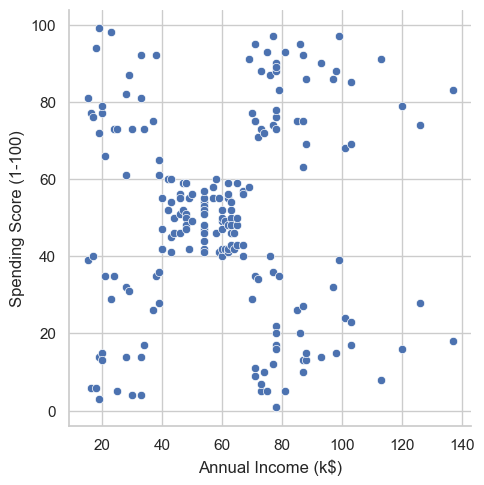

In [25]:
sns.relplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
            data = data_client)

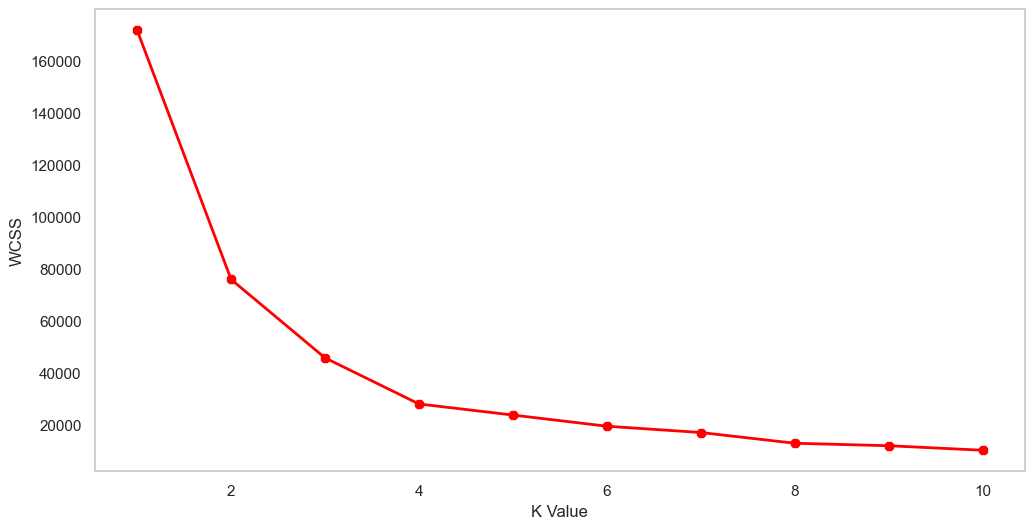

In [28]:
X1 = data_client.loc[:,['Age','Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X1)

print(label)

[1 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 1 1 2 3 1 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2
 3 2 3 0 3 0 1 2 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 3 1 3 0 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 0 3
 2 3 2 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 1
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [30]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]]


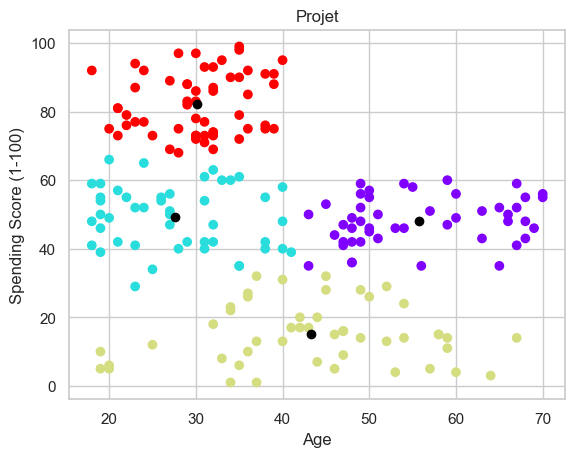

In [31]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Projet')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

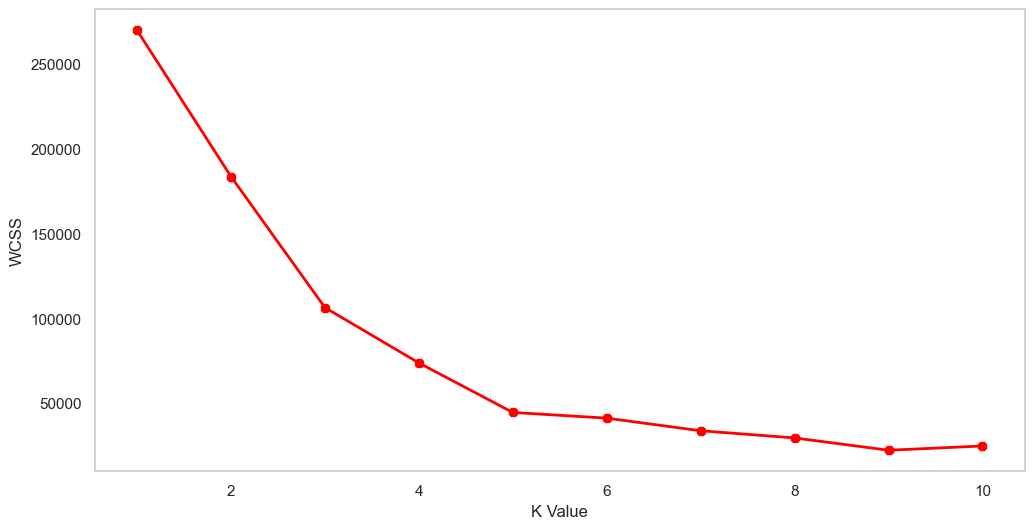

In [34]:
# Creating Clusters based on Annual Income and Spending Score:
X2 = data_client.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X2)

print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 1 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [36]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


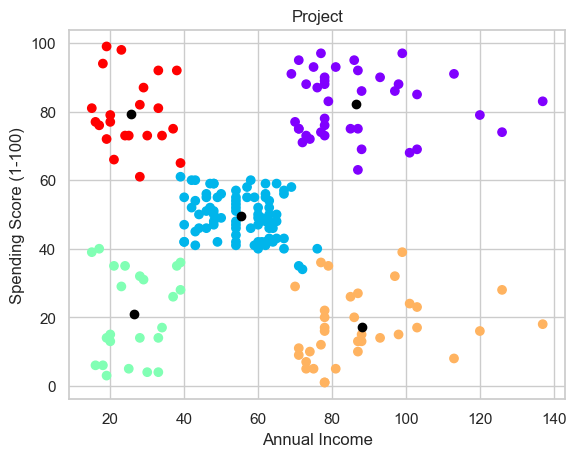

In [37]:
plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Project')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

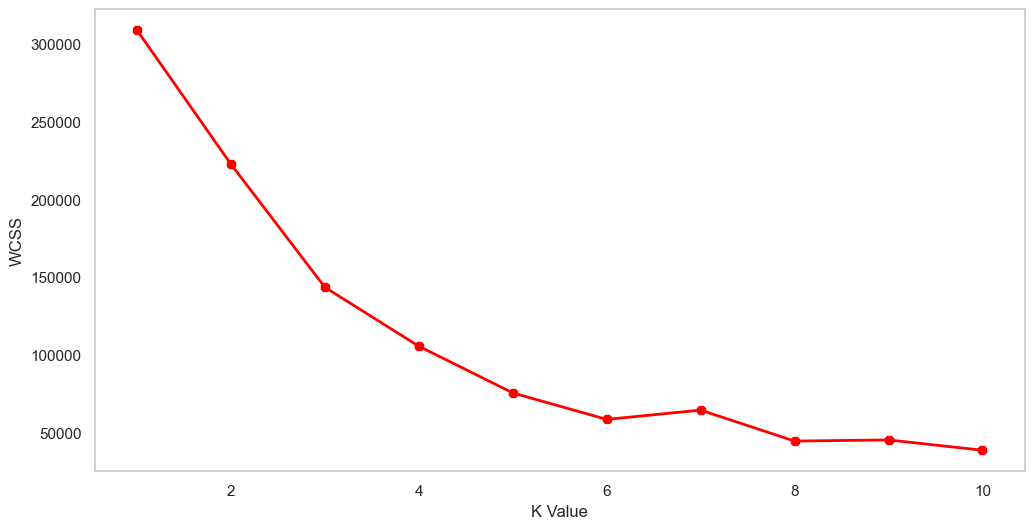

In [38]:
# Creating a Clusters based on Age, Annual Income, and Spending Score:
X3 = data_client.iloc[:,1:]

wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [42]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X3)

print(label)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 4 3 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 1 2 4 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [43]:
print(kmeans.cluster_centers_)

[[25.27272727 25.72727273 79.36363636]
 [40.32432432 87.43243243 18.18918919]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [43.12658228 54.82278481 49.83544304]]


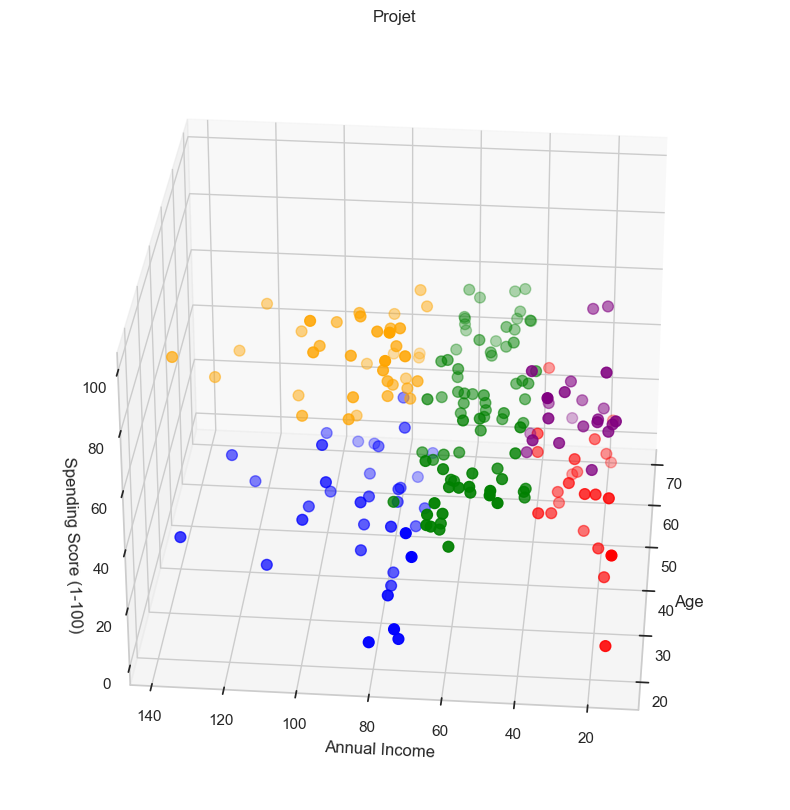

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

clusters = kmeans.fit_predict(X3)
data_client['label'] = clusters


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data_client.Age[data_client.label == 0], data_client['Annual Income (k$)'][data_client.label == 0], data_client['Spending Score (1-100)'][data_client.label == 0], c = 'blue', s = 60)
ax.scatter(data_client.Age[data_client.label == 1], data_client['Annual Income (k$)'][data_client.label == 1], data_client['Spending Score (1-100)'][data_client.label == 1], c = 'red', s = 60)
ax.scatter(data_client.Age[data_client.label == 2], data_client['Annual Income (k$)'][data_client.label == 2], data_client['Spending Score (1-100)'][data_client.label == 2], c = 'green', s = 60)
ax.scatter(data_client.Age[data_client.label == 3], data_client['Annual Income (k$)'][data_client.label == 3], data_client['Spending Score (1-100)'][data_client.label == 3], c = 'orange', s = 60)
ax.scatter(data_client.Age[data_client.label == 4], data_client['Annual Income (k$)'][data_client.label == 4], data_client['Spending Score (1-100)'][data_client.label == 4], c = 'purple', s = 60)
ax.view_init(30,185)

plt.title('Projet')
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')

plt.show()